In [6]:
import pandas as pd

In [7]:
df = pd.read_csv('/content/diminos_data.csv')

In [8]:
df.head()

,order_id,order_placed_at,order_delivered_at
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056


In [9]:
df.tail()

,order_id,order_placed_at,order_delivered_at
14995,1538106,2023-03-27 23:37:05,2023-03-27 23:52:37.409378
14996,1538107,2023-03-27 23:47:38,2023-03-28 00:04:22.672912
14997,1538108,2023-03-27 23:50:16,2023-03-28 00:05:40.676238
14998,1538109,2023-03-27 23:52:44,2023-03-28 00:08:41.810358
14999,1538110,2023-03-27 23:58:20,2023-03-28 00:13:42.499311


In [17]:
df['order_placed_at'] = pd.to_datetime(df['order_placed_at'])

In [18]:
df['order_delivered_at'] = pd.to_datetime(df['order_delivered_at'])

In [19]:
df['delivery_time'] = (df['order_delivered_at'] - df['order_placed_at'])

In [20]:
df['delivery_time'] = df['delivery_time'].dt.total_seconds() / 60

In [21]:
df.head()

,order_id,order_placed_at,order_delivered_at,delivery_time
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,17.140719
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,15.598754
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,15.104856
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,38.533657
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,16.176984


In [24]:
percentile_95 = df['delivery_time'].quantile(0.95)
print(f"The 95th percentile of delivery times is: {percentile_95:.2f} minutes")

The 95th percentile of delivery times is: 27.26 minutes


In [25]:
performance_threshold = 31

if percentile_95 <= performance_threshold:
    print(f"Kanav's store IS meeting the 31-minute delivery metric.")
else:
    print(f"Kanav's store IS NOT meeting the 31-minute delivery metric.")

Kanav's store IS meeting the 31-minute delivery metric.


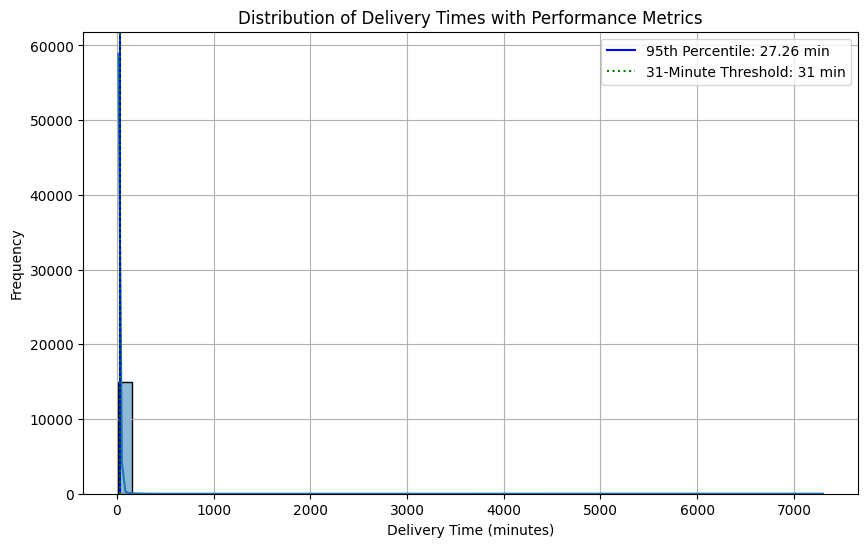

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['delivery_time'], bins=50, kde=True)

plt.axvline(x=percentile_95, color='b',linestyle='solid', label=f'95th Percentile: {percentile_95:.2f} min')
plt.axvline(x=performance_threshold, color='g', linestyle='dotted', label=f'31-Minute Threshold: {performance_threshold} min')

plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Delivery Times with Performance Metrics')
plt.legend()
plt.grid()
plt.show()